<a href="https://colab.research.google.com/github/malikinza/PCA-for-Time-Series-Analysis/blob/main/PCA_for_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv', thousands = ',')
df.tail()


,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387
206,Zimbabwe,409,417,415,419,426,439,453,481,392,430,479,523,571,632,652,680,699,714


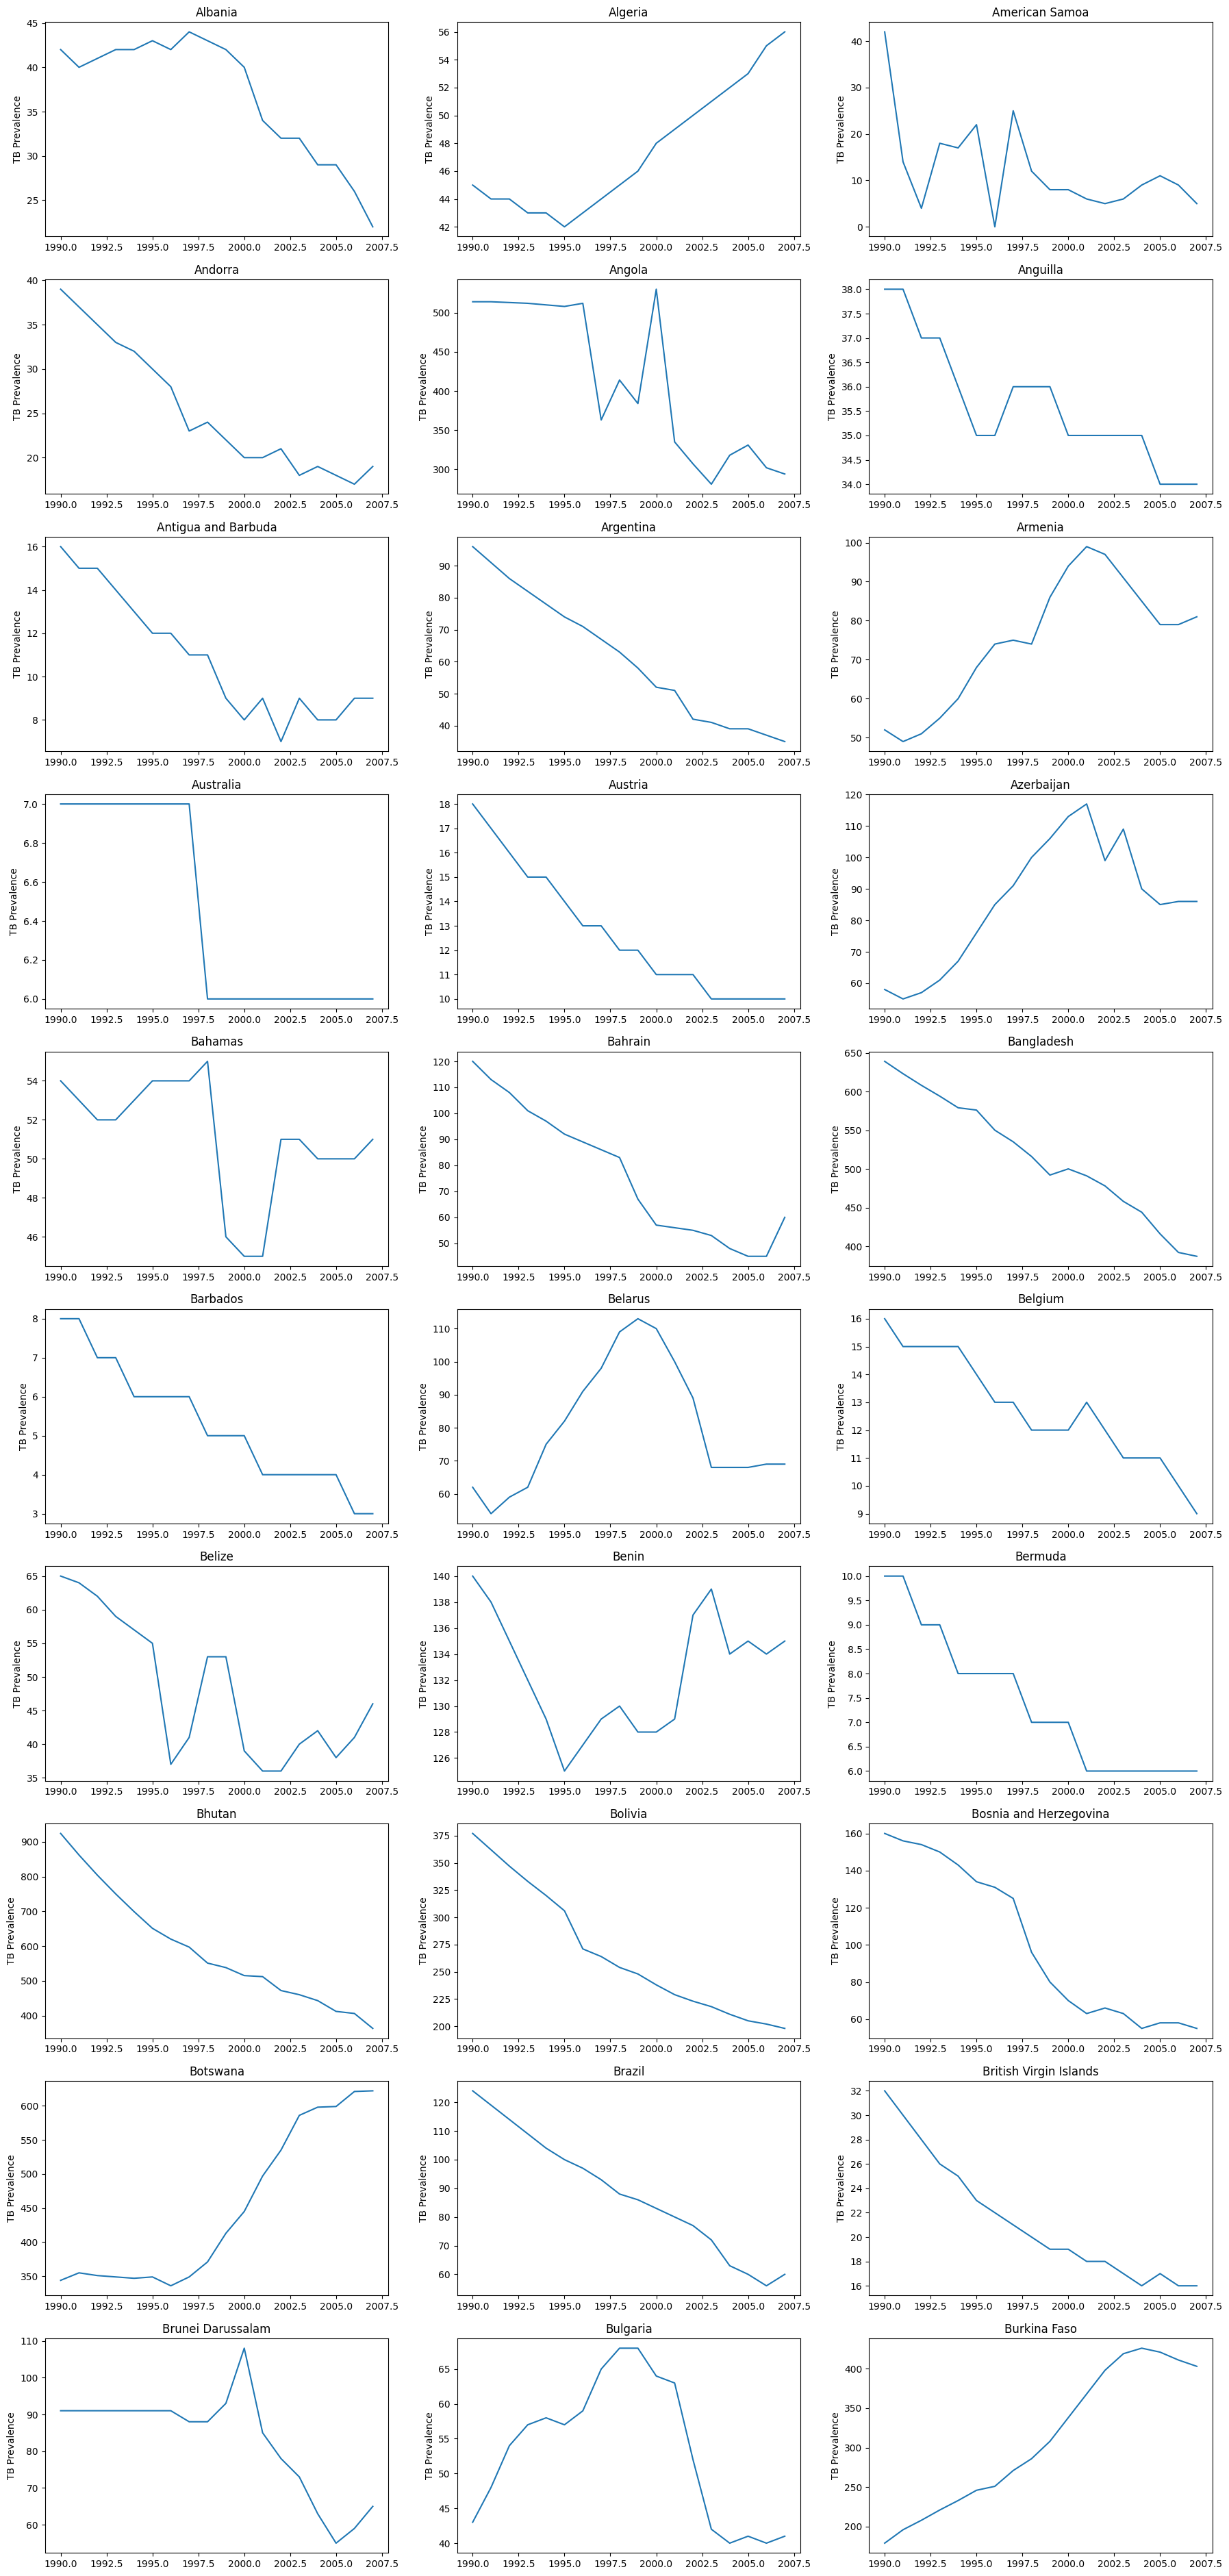

In [3]:
df1 = df.T
fig, axes = plt.subplots(10, 3, figsize=(22,48))

for i in range(1,31):
  y = df.iloc[i,0]
  p =np.asarray(range(1990,2008))
  p = p.astype(int)
  v = df1.iloc[1:,i].values
  v = v.astype(int)
  plt.subplot(10, 3, i)
  plt.plot(p,v)
  plt.title('{}'.format(y))
  #plt.xlabel('Year')
  plt.ylabel('TB Prevalence');


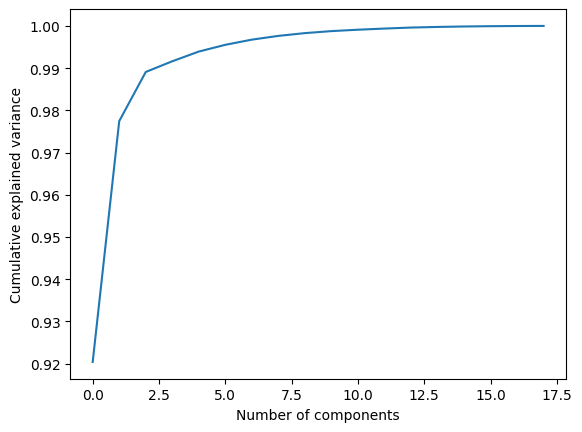

In [4]:
X = df.iloc[:,1:19] #feature
y = df.iloc[:,0] #countries
X_std = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

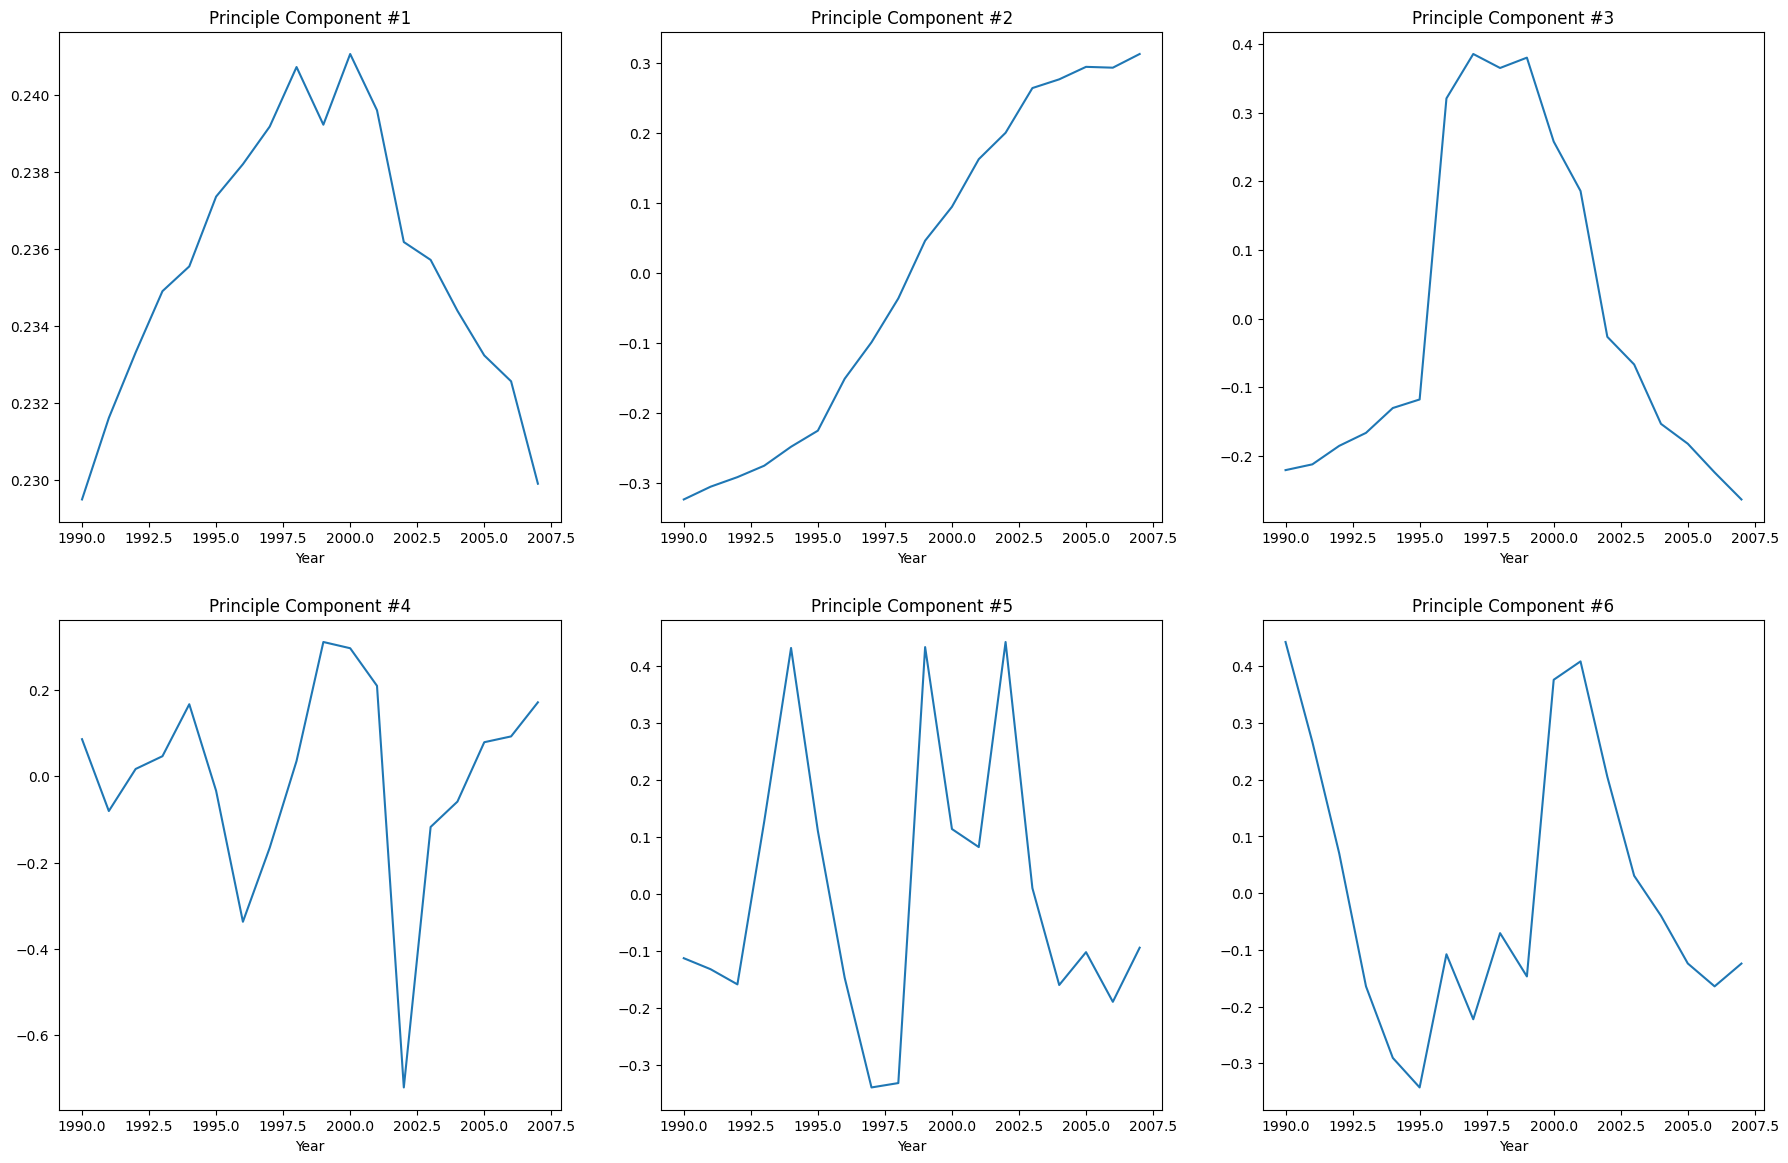

In [6]:
#The first 6 principle components shown as a time series

r = np.asarray(range(1990,2008))
r = r.reshape(18,-1)

n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues


idx = np.argsort(-eigenValues)
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]
eigenVectors 
#print(eigenVectors.shape)
#print(eigenValues.reshape(-1,1).shape)

pc6 = eigenVectors[:,0:6]
#print(pc6.shape)

COUNT = 6
fig = plt.figure(figsize = (22,14))
for i in range(0, COUNT):
  plt.subplot(2, 3, i+1)
  plt.plot(r, pc6[:,i].reshape(18, -1))
  plt.title('Principle Component #{}'.format(i+1))
  plt.xlabel('Year')
plt.show()

Text(0, 0.5, 'TB Prevalence')

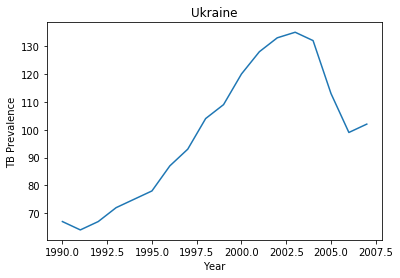

In [ ]:
#selecting a specific country 
sample = df[df['TB prevalence, all forms (per 100 000 population per year)']== 'Ukraine']
sample_X = sample.iloc[:,1:19] #feature
sample_y = sample.iloc[:,0] 

plt.plot(r,sample_X.iloc[0,0:])
plt.title('Ukraine')
plt.xlabel('Year')
plt.ylabel('TB Prevalence')

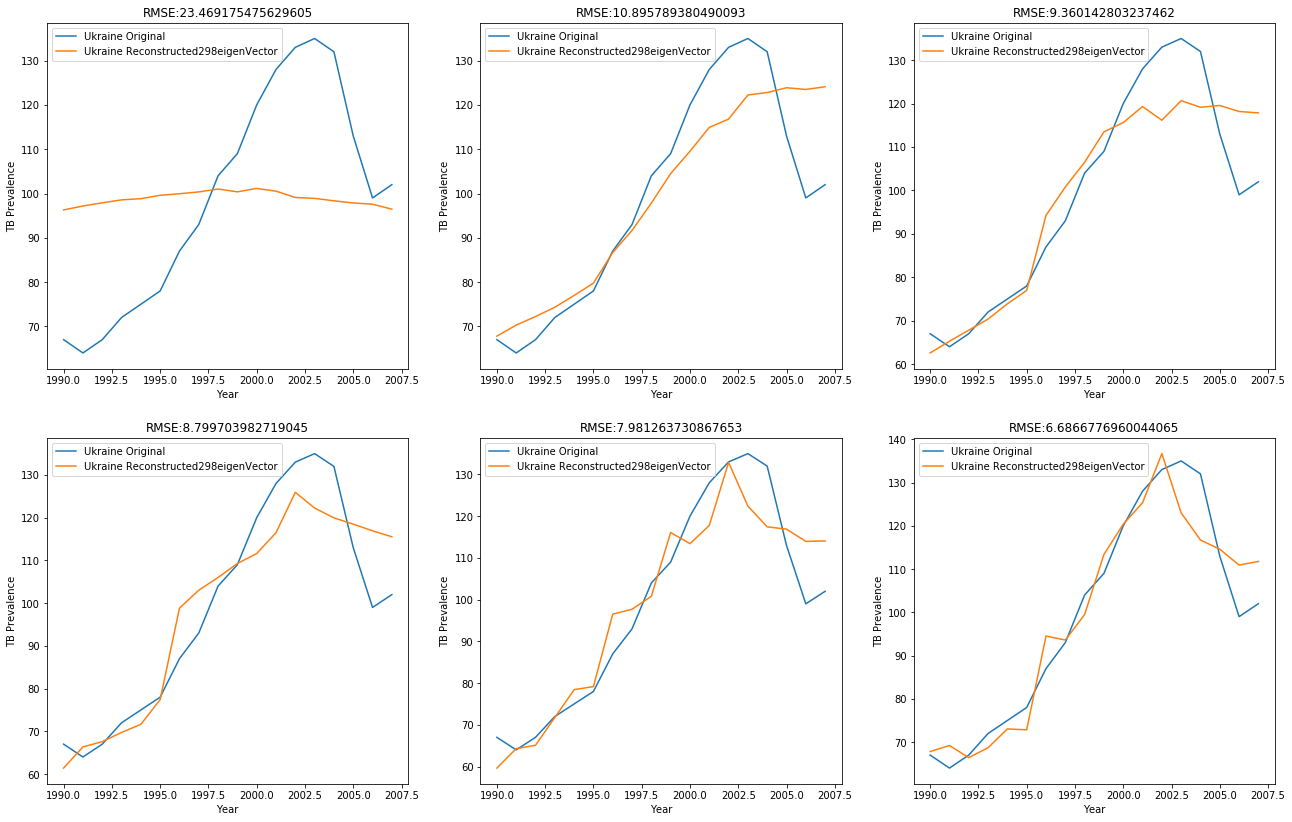

In [ ]:
#incremental reconstruction of Ukraine using the first 6 PCAs

COUNT = 6 
R = []
fig = plt.figure(figsize=(22, 14))
for i in range(0, COUNT):
  numEVs = i+1
  W  = eigenVectors[:,0:numEVs]
  projX = np.dot(sample_X.iloc[0,0:],W)
  recon = np.dot(W,projX)
  plt.subplot(2,3,i+1)
  #plt.plot(r, X_std[191,:].reshape(18, -1), label = 'Ukraine Original')
  plt.plot(r, sample_X.iloc[0,0:], label = 'Ukraine Original')
  plt.plot(r, recon, label = 'Ukraine Reconstructed'+ str(numEvs)+ 'eigenVector')
  plt.xlabel('Year')
  plt.ylabel('TB Prevalence')
  plt.legend()
  R.append(recon.reshape(1,18))
  RE = np.asarray(R)
  rmse = np.sqrt(np.square(sample_X.values - RE[i]).mean())
  plt.title('RMSE:{}'.format(rmse))


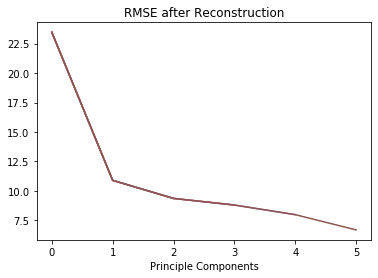

In [ ]:
#RMSE 
RMSE = []
for i in range(0,6):
  RMSE.append(np.sqrt(np.square(sample_X.values - RE[i]).mean())) #vectorized coding
  plt.plot(RMSE)
  plt.title('RMSE after Reconstruction')
  plt.xlabel('Principle Components')
  

In [ ]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
#cumExpVar

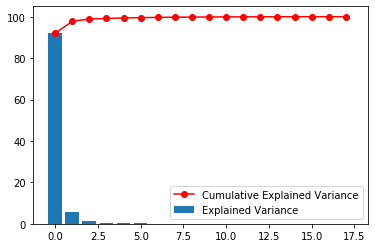

In [ ]:
plt.bar(range(18), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

**After the first three principle components, the cumulated variance changes very little. The first three principle components account for more than 95% of the data, allowing us to reconstruct the data well.**